# polygon to mask

In [14]:
%matplotlib inline

import numpy as np
import cv2
import skimage.draw
import matplotlib.pyplot as plt

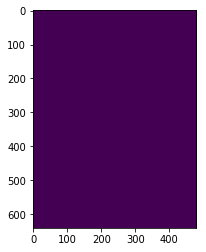

In [99]:
width = 480
height = 640
image = np.zeros((height, width), dtype=np.uint8)
plt.imshow(image)

In [100]:
coords = [(100, 100), (150, 200), (300, 50)] # (x, y)

## cv2

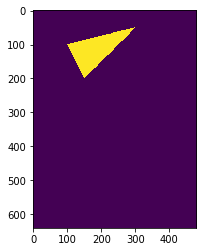

In [101]:
image = np.zeros((height, width), dtype=np.uint8)
cv2.fillConvexPoly(image, np.array(coords), 1)
plt.imshow(image)

## skimage

In [102]:
xx, yy = list(zip(*coords))
rr, cc = skimage.draw.polygon(yy, xx)

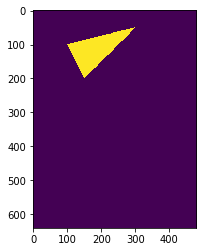

In [103]:
image[rr, cc] = 1
plt.imshow(image)

# mask to polygon

## cv2

https://docs.opencv.org/trunk/d4/d73/tutorial_py_contours_begin.html

In [104]:
image, contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

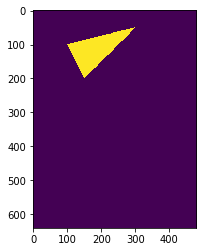

In [105]:
plt.imshow(image)

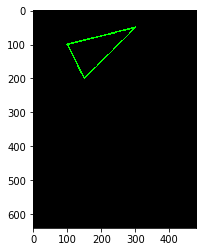

In [106]:
result_image = np.zeros((height, width, 3), dtype=np.uint8)
cv2.drawContours(result_image, contours, 0, (0, 255, 0), 3)
plt.imshow(result_image)

In [110]:
cv2.boundingRect(contours[0])

(100, 50, 201, 151)

In [112]:
cv2.boundingRect(np.array(coords))

(100, 50, 201, 151)

## skimage

- http://scikit-image.org/docs/dev/auto_examples/edges/plot_polygon.html
- http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html

In [113]:
import skimage.measure

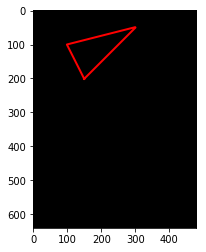

In [114]:
contours = skimage.measure.find_contours(image, 0)
coords1 = skimage.measure.approximate_polygon(contours[0], tolerance=1)
result_image = np.zeros((height, width, 3), dtype=np.uint8)
plt.imshow(result_image)
plt.plot(coords1[:, 1], coords1[:, 0], '-r', linewidth=2)